# Applying Filters in Spatial and Frequency Domains to Brad Pitt
We will Apply a bunch of filters in the spatial and frequency domains to Brad Pitt's image.

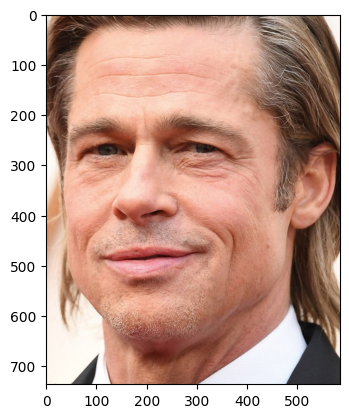

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

og_img = cv.imread("task2.jpg", cv.IMREAD_COLOR_RGB)

plt.imshow(og_img)

# 2.1 Spatial Domain
Select a Gaussian smoothing filter with the two parameters of variance and kernel size of your choice. You can experiment with different values of these parameters and see the effect on the image. Filter the given image with this Gaussian kernel

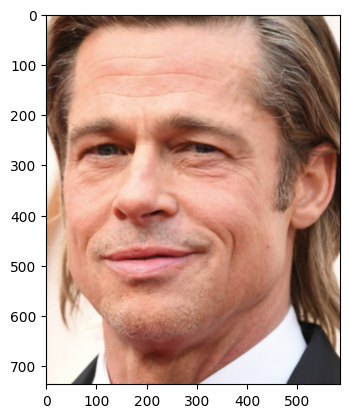

In [12]:
k_size = 5
sigma = 1
gaussed_img = cv.GaussianBlur(og_img, ksize=(k_size, k_size), sigmaX=sigma, sigmaY=sigma)

plt.imshow(gaussed_img)

# 2.2 Frequency Domain Low-Pas Filter
Now we will do the same smoothing in the frequency domain. The Discrete Fourier Transform of a Gaussian kernel turns out to be, in fact, a low pass filter. Firsly, we calculate the 2D FFT of the Gaussian filter we created above, and plot it so that the zero frequency component is at the centre of the plot.

We will include the zero-centered FFT here.

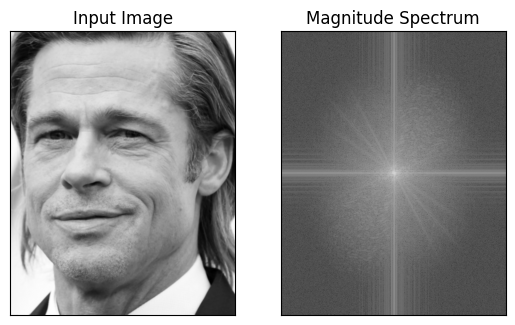

In [16]:
gray_img = cv.cvtColor(gaussed_img, cv.COLOR_RGB2GRAY)
f = np.fft.fft2(gray_img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(gray_img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# 2.3 Frequency Domain Filtering
We will filter Brad Pitt with a low-pass image in the frequency domain. The goal is to get a visually smooth looking skin in the image. We will filter the image above with the low-pass filter and then use the inverse FFT to get the filtered image back in the spatial domain.

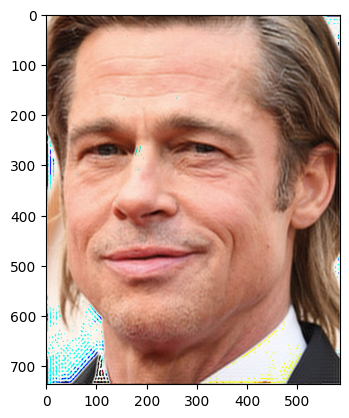

In [48]:
filtered_channels = []
radius = 100  # Change radius for smoothing effect

for i in range(3):  # For each channel R,G,B
    # Step 2: FFT
    f_channel = np.fft.fft2(og_img[:,:,i])
    fshift = np.fft.fftshift(f_channel)

    # Step 3: Low-Pass Filter Mask (center circle)
    rows, cols = og_img[:,:,i].shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv.circle(mask, (ccol, crow), radius, 1, thickness=-1)

    # Step 4: Apply Mask
    fshift_filtered = fshift * mask

    # Step 5: Inverse FFT
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back).astype(np.uint8)

    filtered_channels.append(img_back)

# Step 6: Merge Channels and Save
img_filtered = cv.merge(filtered_channels)
plt.imshow(img_filtered)

# Compare the two images

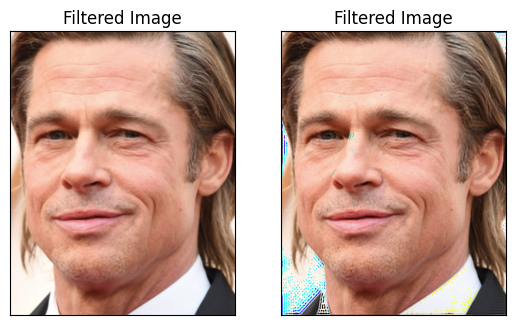

In [49]:
plt.subplot(121)
plt.imshow(gaussed_img, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()